폐암 수술 환자의 생존유무 예측하기 ( 1: 생존, 0 : 사망)

데이터 준비하기

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#랜덤 시드 고정시키기
np.random.seed(5)

In [2]:
dataset = np.loadtxt('/content/ThoraricSurgery.csv', delimiter=',')
dataset

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

데이터셋 생성하기 - 입력(속성값 17개; 문제집), 출력 (판정결과 1개; 정답지) 변수로 분리

In [8]:
# 학습 데이터 420개 가져오기
X_train = dataset[:420, 0:17]
y_train = dataset[:420,17]

# 테스트 데이터 50개 가져오기
X_test = dataset[420:, 0:17]
y_test = dataset[420:, 17]

X_train.shape

(420, 17)

모델 구성하기

In [9]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu')) #input_dim=17 총 17개의 피쳐들이 있다. 모두 레이어가 있으니까 Dense함수 사용.
model.add(Dense(20, activation='relu'))# Dense라는 층에서 
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 0과 1로 나뉘는 이진분류일때 사용.

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


모델 설정하기

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

모델 학습하기

In [12]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64)

Epoch 1/100
7/7 [==============================] - 15s 3ms/step - loss: 7.2687 - accuracy: 0.1787
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8498 - accuracy: 0.8595
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4397 - accuracy: 0.8703
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.5522 - accuracy: 0.8458
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1208 - accuracy: 0.8366
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.8841
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7942
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.8684
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8651
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8613
Epoch 11/100
7/7 [==========

학습 결과 그려보기

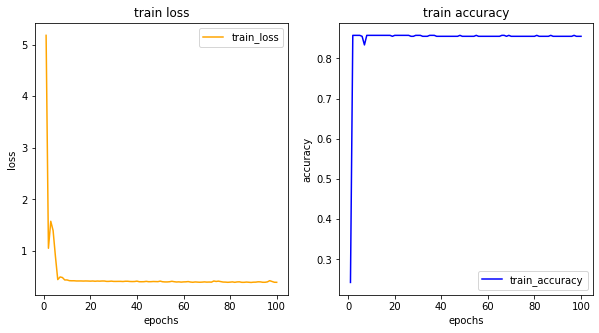

In [13]:
#한눈에 볼 수 없으니까, 정확도를 그려보자

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


모델 평가하기

In [14]:
scores = model.evaluate(X_test,y_test)


2/2 [==============================] - 1s 11ms/step - loss: 0.5122 - accuracy: 0.8000


In [15]:
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))

accuracy : 80.00%


In [16]:
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [17]:
# 모델 예측하기
result = model.predict_classes(X_test)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
result

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [18]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        40
         1.0       0.00      0.00      0.00        10

    accuracy                           0.80        50
   macro avg       0.40      0.50      0.44        50
weighted avg       0.64      0.80      0.71        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


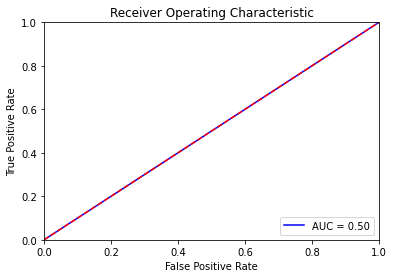

In [19]:
plot_auc_roc(model)